# Lab Instructions

Look through Kaggle or another source to find a dataset that contains both spatial and time data.  Using at least three visualizations, explain to me how the subject of your dataset changes (or remains the same if that's what's interesting) across space and throughout time.

   FIPS Code  State/Area  Year  Month  \
0          1     Alabama  1976      1   
1          2      Alaska  1976      1   
2          4     Arizona  1976      1   
3          5    Arkansas  1976      1   
4          6  California  1976      1   

  Total Civilian Non-Institutional Population in State/Area  \
0                                       2,605,000             
1                                         232,000             
2                                       1,621,000             
3                                       1,536,000             
4                                      15,621,000             

  Total Civilian Labor Force in State/Area  \
0                             1,484,555      
1                               160,183      
2                               964,120      
3                               889,044      
4                             9,774,280      

   Percent (%) of State/Area's Population Total Employment in State/Area  \
0                    

C:\Users\nekao\AppData\Local\Temp\ipykernel_6036\2961134891.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_unemployment.values, y=avg_unemployment.index, palette='coolwarm')


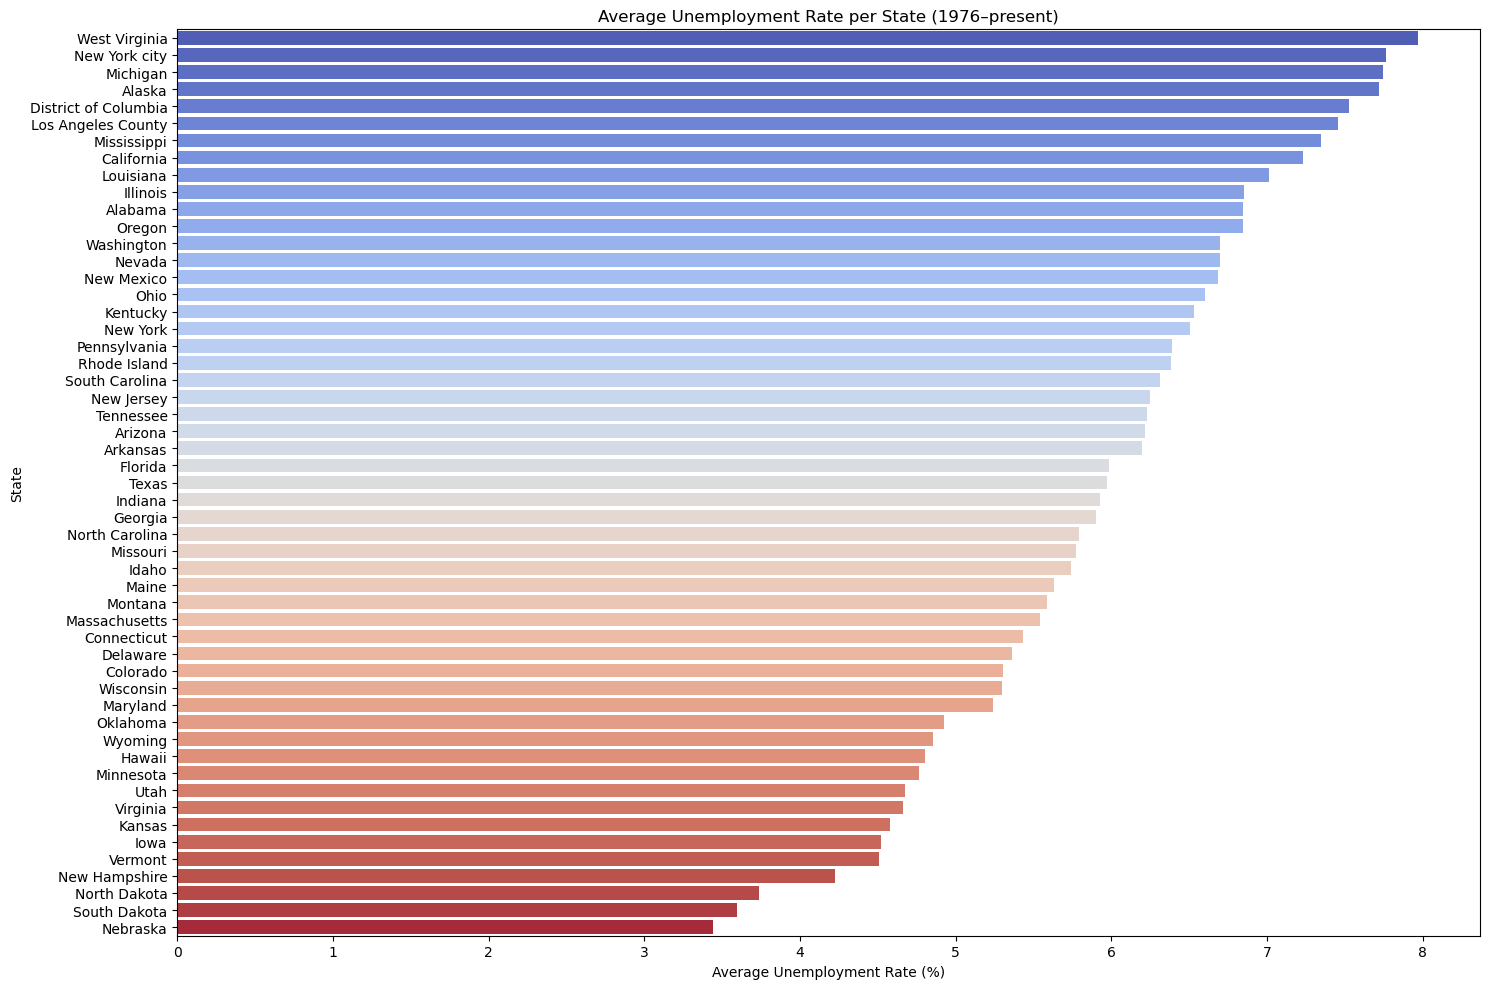

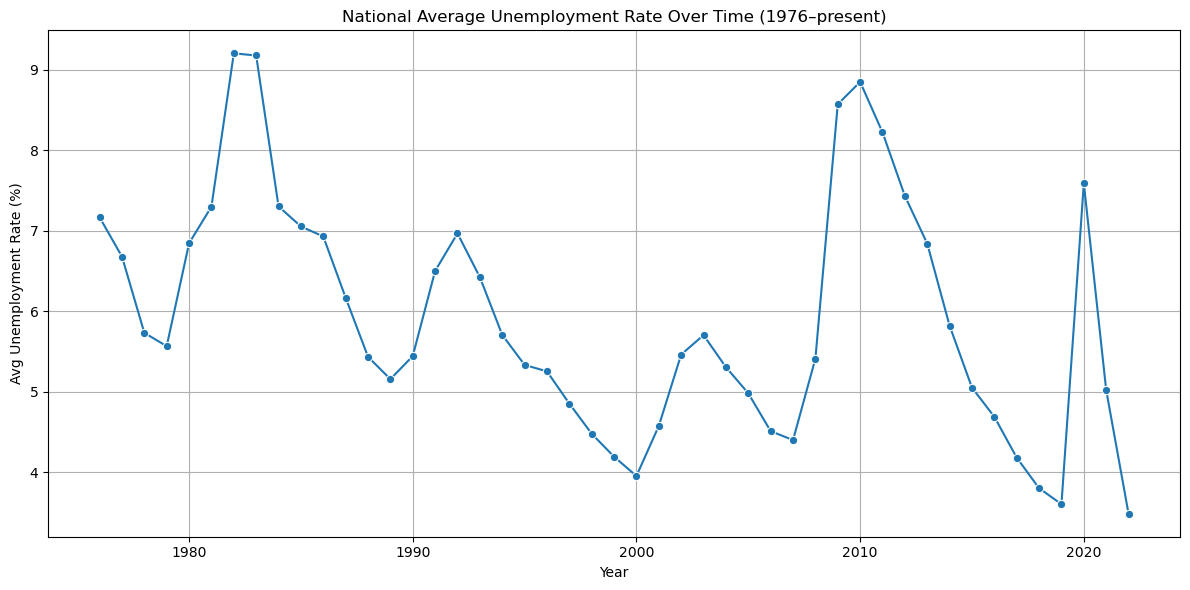

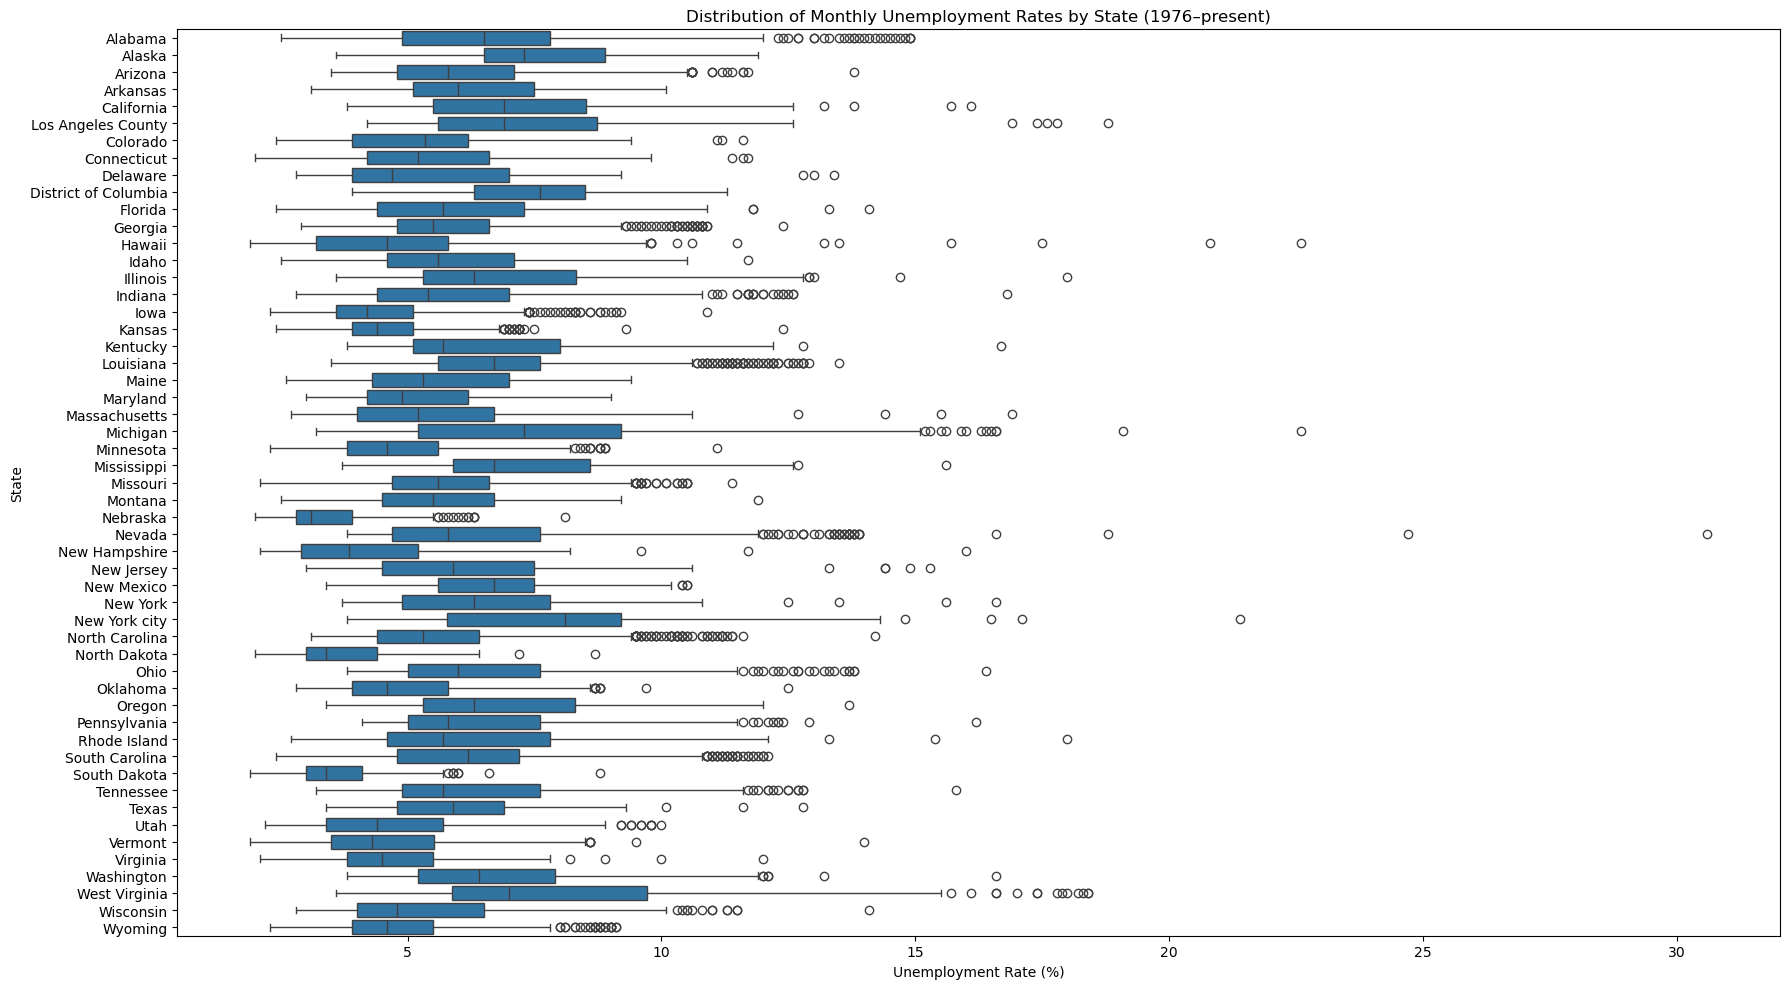

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("Unemployment in America Per US State.csv")
print(df.head())

numeric_columns = [
    'Total Civilian Non-Institutional Population in State/Area',
    'Total Civilian Labor Force in State/Area',
    'Total Employment in State/Area',
    'Total Unemployment in State/Area',
    'Percent (%) of Labor Force Employed in State/Area',
    'Percent (%) of Labor Force Unemployed in State/Area'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')

avg_unemployment = df.groupby('State/Area')['Percent (%) of Labor Force Unemployed in State/Area'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x=avg_unemployment.values, y=avg_unemployment.index, palette='coolwarm')
plt.title("Average Unemployment Rate per State (1976–present)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

yearly_avg = df.groupby('Year')['Percent (%) of Labor Force Unemployed in State/Area'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker='o')
plt.title("National Average Unemployment Rate Over Time (1976–present)")
plt.xlabel("Year")
plt.ylabel("Avg Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x='Percent (%) of Labor Force Unemployed in State/Area', y='State/Area')
plt.title("Distribution of Monthly Unemployment Rates by State (1976–present)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# How does the dataset change
depending on the visualization we can either be going off per state overall average to over all based on the year.